In [10]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 6

In [54]:
df = pd.read_csv('roof_converted.csv')
print(df.shape)
df.head()

(31285, 9)


zip    nbld  pct.suitable           area        lat        lon state  \
0  1001  5547.0      0.437714   91944.360000  42.063696 -72.626944    MA   
1  1002  4356.0      0.721028  235264.714956  42.340380 -72.496819    MA   
2  1003   229.0      0.737981   12236.458753        NaN        NaN   NaN   
3  1005  1800.0      0.760034   97263.192488  42.422836 -72.105084    MA   
4  1007  3936.0      0.762852  212683.306506  42.287243 -72.402142    MA   

          city        wealth  
0       Agawam  20140.446240  
1      Amherst  14289.002823  
2          NaN           NaN  
3        Barre  18354.249852  
4  Belchertown  23382.437299

In [55]:
df = df[['zip', 'area', 'lat', 'lon', 'state', 'city']]
df.head()

zip           area        lat        lon state         city
0  1001   91944.360000  42.063696 -72.626944    MA       Agawam
1  1002  235264.714956  42.340380 -72.496819    MA      Amherst
2  1003   12236.458753        NaN        NaN   NaN          NaN
3  1005   97263.192488  42.422836 -72.105084    MA        Barre
4  1007  212683.306506  42.287243 -72.402142    MA  Belchertown

In [56]:
df.dropna(axis = 0, how = 'any', inplace = True)
print(df.shape)

(28882, 6)


In [8]:
df['area_color'] = df.area >= df.area.mean()
df['area_color'] = df['area_color'].map({False:'#0000FF', True:'#FF0000'})

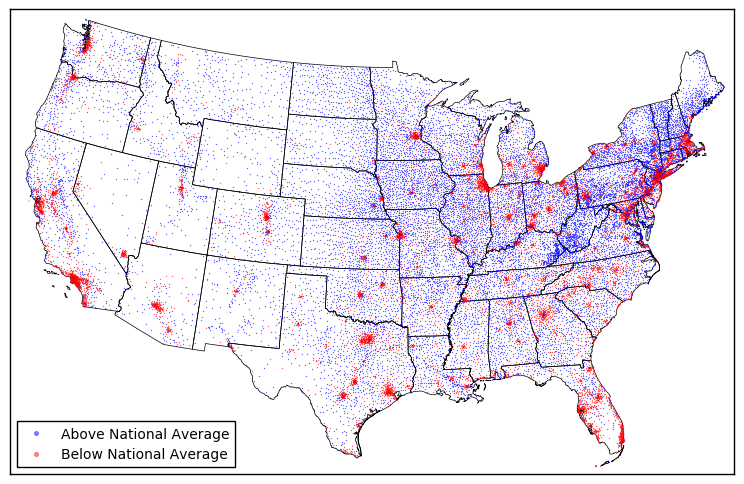

In [49]:
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)
map.fillcontinents(color ='#ffffff')
df1 = df.loc[df['area_color'] == '#0000FF', ]
df2 = df.loc[df['area_color'] == '#FF0000',]
lons = df1.lon.values.tolist()
lats = df1.lat.values.tolist()
lons2 = df2.lon.values.tolist()
lats2 = df2.lat.values.tolist()
x,y = map(lons, lats)
x2,y2 = map(lons2, lats2)
map.plot(x, y, 'b.', markersize = 1, alpha = 0.5, label='Above National Average')
map.plot(x2, y2, 'r.', markersize = 1, alpha = 0.5, label='Below National Average')

plt.legend(markerscale = 6, fontsize = 10, numpoints=1, loc = 'lower left')

plt.savefig('roof.png', bbox_inches='tight')

In [64]:
df2 = pd.read_csv('utility_converted.csv')
print(df2.shape)
df2.head()

(39921, 5)


zip state  comm_rate  res_rate  ind_rate
0   501    NY   0.122015  0.145826  0.000000
1   544    NY   0.122015  0.145826  0.000000
2  1001    MA   0.126099  0.145852  0.101999
3  1002    MA   0.124622  0.141980  0.110678
4  1003    MA   0.126099  0.145852  0.101999

In [65]:
df2 = pd.merge(df2, df, how = 'inner', on = 'zip')
print(df2.shape)
df2.head()

(28339, 10)


zip state_x  comm_rate  res_rate  ind_rate           area        lat  \
0  1001      MA   0.126099  0.145852  0.101999   91944.360000  42.063696   
1  1002      MA   0.124622  0.141980  0.110678  235264.714956  42.340380   
2  1005      MA   0.113755  0.139230  0.113988   97263.192488  42.422836   
3  1007      MA   0.119927  0.142541  0.107994  212683.306506  42.287243   
4  1008      MA   0.126099  0.145852  0.101999   39680.965795  42.183704   

         lon state_y         city  
0 -72.626944      MA       Agawam  
1 -72.496819      MA      Amherst  
2 -72.105084      MA        Barre  
3 -72.402142      MA  Belchertown  
4 -72.969678      MA    Blandford

In [66]:
df2 = df2[['zip', 'lat', 'lon', 'city', 'state_x', 'res_rate']]

In [68]:
df2['rate_color'] = df2.res_rate >= df2.res_rate.mean()
df2['rate_color'] = df2['rate_color'].map({False:'#0000FF', True:'#FF0000'})

In [70]:
df2.head()

zip        lat        lon         city state_x  res_rate rate_color
0  1001  42.063696 -72.626944       Agawam      MA  0.145852    #FF0000
1  1002  42.340380 -72.496819      Amherst      MA  0.141980    #FF0000
2  1005  42.422836 -72.105084        Barre      MA  0.139230    #FF0000
3  1007  42.287243 -72.402142  Belchertown      MA  0.142541    #FF0000
4  1008  42.183704 -72.969678    Blandford      MA  0.145852    #FF0000

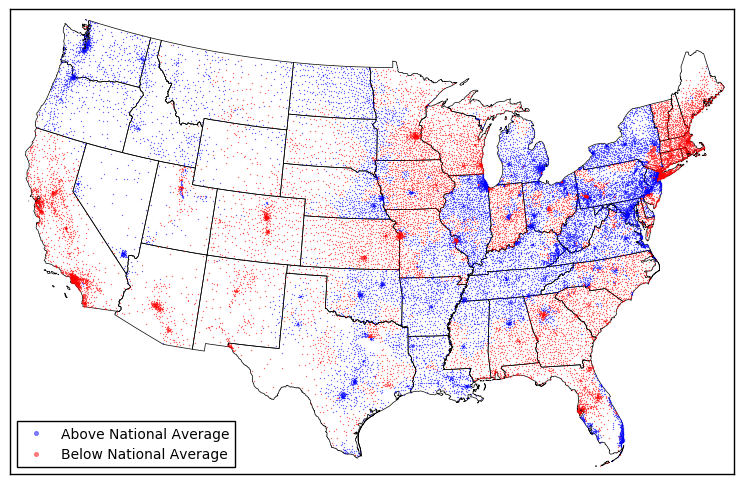

In [72]:
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)
map.fillcontinents(color ='#ffffff')

df2_1 = df2.loc[df2['rate_color'] == '#0000FF', ]
df2_2 = df2.loc[df2['rate_color'] == '#FF0000',]
lons2_1 = df2_1.lon.values.tolist()
lats2_1 = df2_1.lat.values.tolist()
lons2_2 = df2_2.lon.values.tolist()
lats2_2 = df2_2.lat.values.tolist()
x2_1,y2_1 = map(lons2_1, lats2_1)
x2_2,y2_2 = map(lons2_2, lats2_2)
map.plot(x2_1, y2_1, 'b.', markersize = 1, alpha = 0.5, label='Above National Average')
map.plot(x2_2,y2_2, 'r.', markersize = 1, alpha = 0.5, label='Below National Average')

plt.legend(markerscale = 6, fontsize = 10, numpoints=1, loc = 'lower left')

plt.savefig('utility.png', bbox_inches='tight')

In [73]:
df3 = pd.read_csv('roof_converted.csv')
print(df3.shape)
df3.head()

(31285, 9)


zip    nbld  pct.suitable           area        lat        lon state  \
0  1001  5547.0      0.437714   91944.360000  42.063696 -72.626944    MA   
1  1002  4356.0      0.721028  235264.714956  42.340380 -72.496819    MA   
2  1003   229.0      0.737981   12236.458753        NaN        NaN   NaN   
3  1005  1800.0      0.760034   97263.192488  42.422836 -72.105084    MA   
4  1007  3936.0      0.762852  212683.306506  42.287243 -72.402142    MA   

          city        wealth  
0       Agawam  20140.446240  
1      Amherst  14289.002823  
2          NaN           NaN  
3        Barre  18354.249852  
4  Belchertown  23382.437299

In [74]:
df3 = df3[['zip', 'lat', 'lon', 'wealth', 'state', 'city']]

In [76]:
df3.dropna(axis = 0, how = 'any', inplace = True)

In [77]:
df3['income_color'] = df3.wealth >= df3.wealth.mean()
df3['income_color'] = df3['income_color'].map({False:'#0000FF', True:'#FF0000'})

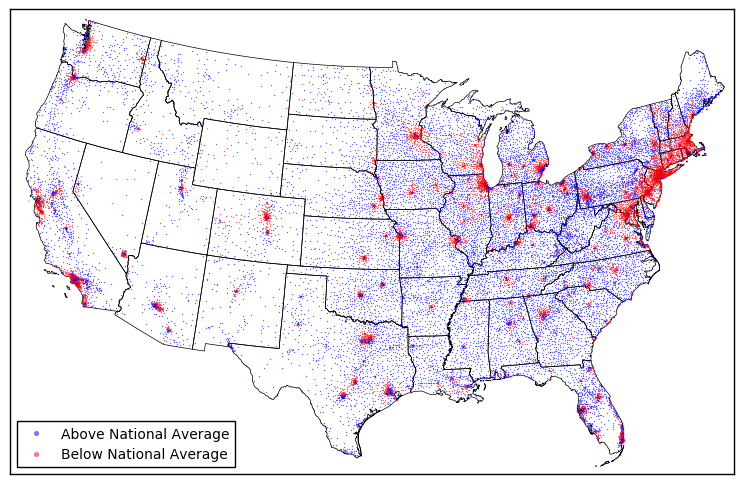

In [79]:
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)
map.fillcontinents(color ='#ffffff')

df3_1 = df3.loc[df3['income_color'] == '#0000FF', ]
df3_2 = df3.loc[df3['income_color'] == '#FF0000',]
lons3_1 = df3_1.lon.values.tolist()
lats3_1 = df3_1.lat.values.tolist()
lons3_2 = df3_2.lon.values.tolist()
lats3_2 = df3_2.lat.values.tolist()
x3_1,y3_1 = map(lons3_1, lats3_1)
x3_2,y3_2 = map(lons3_2, lats3_2)
map.plot(x3_1, y3_1, 'b.', markersize = 1, alpha = 0.5, label='Above National Average')
map.plot(x3_2,y3_2, 'r.', markersize = 1, alpha = 0.5, label='Below National Average')

plt.legend(markerscale = 6, fontsize = 10, numpoints=1, loc = 'lower left')

plt.savefig('income.png', bbox_inches='tight')

In [80]:
from matplotlib.patches import Polygon

In [100]:
incentive = pd.read_csv('incentive.csv')
print(incentive.shape)
incentive.head()

(50, 2)


NAME  incentive
0     Alabama         35
1      Alaska         24
2     Arizona         80
3    Arkansas         48
4  California        272

In [101]:
incentive.set_index(['NAME'], inplace = True)

In [102]:
num_colors = 5
values = incentive['incentive']
cm = plt.get_cmap('Greens')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
incentive['bin'] = np.digitize(values, bins) - 1
incentive.sort_values('bin', ascending=False).head(10)

incentive  bin
NAME                      
California        272    4
Minnesota         212    3
Texas             165    2
Wisconsin         145    2
Colorado          147    2
Oregon            150    2
Washington        161    2
Iowa              114    1
Ohio               83    1
Missouri           89    1

In [119]:
scheme

[(0.9686274528503418, 0.98823529481887817, 0.96078431606292725, 1.0),
 (0.82745099067687988, 0.93254902362823489, 0.8031372666358948, 1.0),
 (0.59607844948768618, 0.834509813785553, 0.5788235485553741, 1.0),
 (0.29490197300910947, 0.69019609689712524, 0.38431373238563538, 1.0),
 (0.082352945208549494, 0.49803923368453978, 0.23137255907058715, 1.0)]

In [103]:
import matplotlib as mpl

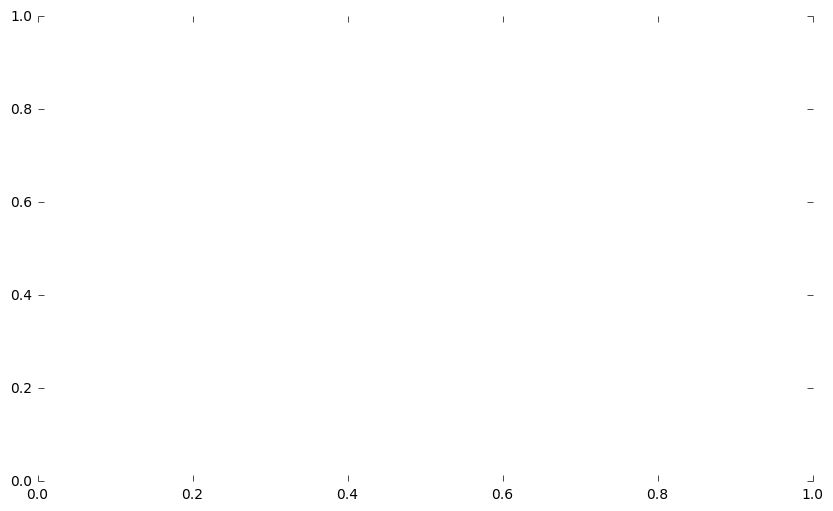

In [107]:
#mpl.style.use('map')
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

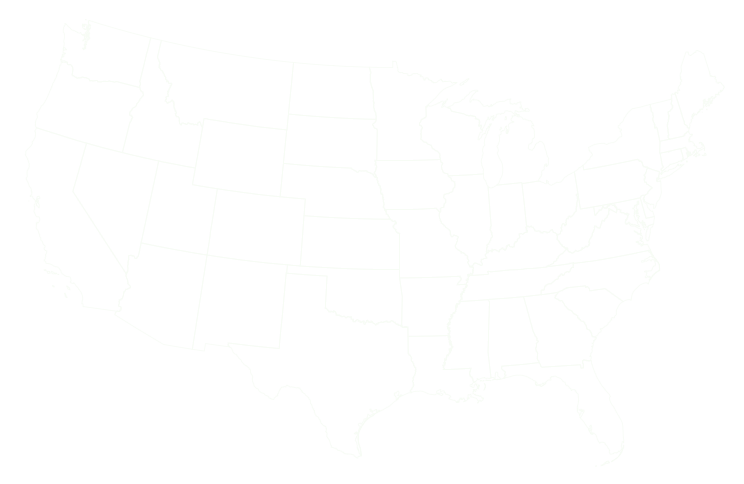

In [120]:
from matplotlib.collections import PatchCollection
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.drawmapboundary(color='w')

map.readshapefile('st99_d00', color= '#444444', name='states')
for info, shape in zip(map.states_info, map.states):
    iso3 = info['NAME']
    if iso3 not in incentive.index:
        color = '#dddddd'
    else:
        color = scheme[incentive.ix[iso3]['bin']]

        
        
patches = [Polygon(np.array(shape), True)]
pc = PatchCollection(patches)
pc.set_facecolor(color)
ax.add_collection(pc)

ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])



In [116]:
patches

In [115]:
scheme[incentive.ix['California']['bin']]

(0.082352945208549494, 0.49803923368453978, 0.23137255907058715, 1.0)

In [94]:
print(map.states_info[0])

{'DIVISION': '9', 'RINGNUM': 1, 'LSAD_TRANS': b'                                                  ', 'ST99_D00_I': 1, 'STATE': '02', 'SHAPENUM': 1, 'PERIMETER': '2.27171421517178E+02', 'AREA': '2.71254383622068E+02', 'NAME': 'Alaska', 'REGION': '4', 'LSAD': '01', 'ST99_D00_': 2}


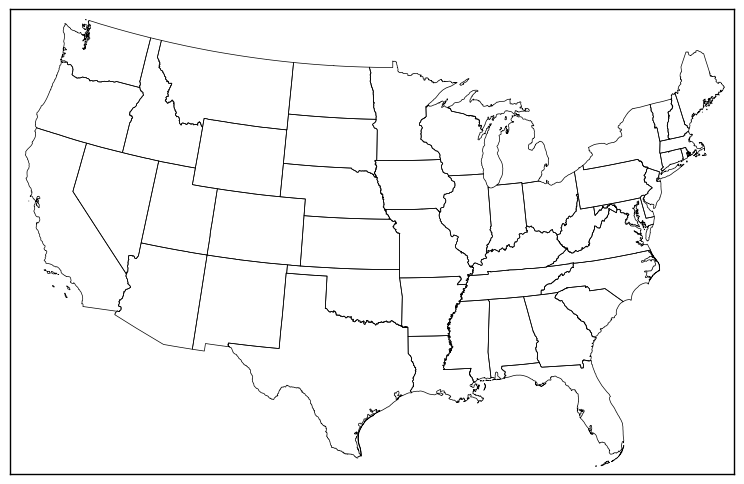

In [82]:
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.readshapefile('st99_d00', name='states', drawbounds=True)
map.fillcontinents(color ='#ffffff')

ax = plt.gca()
seg = map.states[state_names.index('Texas')]
poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

In [5]:
# bokeh

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()
from bokeh.sampledata import us_states
us_states = us_states.data.copy()

del us_states["HI"]
del us_states["AK"]

state_xs = [us_states[code]["lons"] for code in us_states]
state_ys = [us_states[code]["lats"] for code in us_states]

# init figure
p = figure(title="Areas of Suitable Rooftops for Solar Deployment",
           toolbar_location="above", plot_width=900, plot_height=600)

# Draw state lines
p.patches(state_xs, state_ys, fill_alpha=0.0, fill_color = '#FA8072',
          line_color="#884444", line_width=1.5)

x = df.lon
y = df.lat

# The scatter markers
p.circle(x, y, size=1, color=df.area_color, alpha=0.3)

show(p)

Loading BokehJS ...

In [6]:
df[['area']].quantile([.25, .5, .75])

area
0.25   39529.050973
0.50   92462.394366
0.75  238894.788727

In [7]:
df['area_score'] = 0

In [8]:
df.loc[df.area < 39529.050973, 'area_score'] = 1
df.loc[(df.area >= 39529.050973) & (df.area < 92462.394366), 'area_score'] = 2
df.loc[(df.area >= 92462.394366) & (df.area < 238894.788727), 'area_score'] = 3
df.loc[df.area >= 238894.788727, 'area_score'] = 4

In [10]:
df['area_color2'] = df['area_score'].map({4:'#c51b8a', 3:'#fdbb84', 2: '#a8ddb5', 1: '#e0f3db'})

In [10]:
p.circle(x, y, size=df.area_score.astype(int), color='#c51b8a', alpha=0.3)

show(p)

In [12]:
history = pd.read_csv('history_clean.csv')

/Users/yanfeiwu/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,7,9,10,11,12,13,14,15,19,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
print(history.shape)
history.head()

(1020219, 28)


zipcode state date_installed incentive_prog_names type  size_kw  \
0  78702.0    TX     12/12/2013        Austin Energy  uir    10.56   
1  78702.0    TX     07/11/2014        Austin Energy  uir    12.72   
2  78702.0    TX     01/17/2014        Austin Energy  uir     5.40   
3  78702.0    TX     09/27/2012        Austin Energy  uir     7.50   
4  78702.0    TX     09/26/2012        Austin Energy  uir     5.00   

  install_type installer  cost_per_watt      cost    ...      \
0  residential       NaN       2.897777  30600.53    ...       
1  residential       NaN       3.144654   40000.0    ...       
2  residential       NaN       4.197330  22665.58    ...       
3  residential       NaN       3.750000   28125.0    ...       
4  residential       NaN       3.850000   19250.0    ...       

  annual_insolation   rebate sales_tax_cost tracking_type  \
0          5.157692  15000.0    1151.693704         Fixed   
1          5.085633  15000.0    1507.165990         Fixed   
2          5.262714   7735.5     854.019783         Fixed   
3          4.920972  14550.0    1058.523673         Fixed   
4          5.304778   9600.0     724.500647         Fixed   

             manuf2_clean            manuf3_clean            manuf1_clean  \
0  Chint Solar (Zhejiang)  Chint Solar (Zhejiang)  Chint Solar (Zhejiang)   
1                     NaN                     NaN                     NaN   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

   inv_man_clean  reported_annual_energy_prod pbi_length  
0            NaN                      13836.0        NaN  
1            NaN                      16419.0        NaN  
2            NaN                       7235.0        NaN  
3            NaN                       9340.0        NaN  
4            NaN                       6729.0        NaN  

[5 rows x 28 columns]

In [14]:
pd.isnull(history).sum()

zipcode                              3
state                                0
date_installed                       1
incentive_prog_names            222265
type                                 0
size_kw                              0
install_type                     42576
installer                       317934
cost_per_watt                   257559
cost                             21528
lbnl_tts_version_year           222266
lbnl_tts                        222266
city                            221544
utility_clean                   227507
tech_1                          439305
model1_clean                    439308
county                           21590
annual_PV_prod                  239259
annual_insolation               239259
rebate                          633496
sales_tax_cost                  664910
tracking_type                   494164
manuf2_clean                    788618
manuf3_clean                    810572
manuf1_clean                    819104
inv_man_clean            

In [18]:
history.groupby('state').size()

state
AK                                             22
AL                                             32
AR                                            239
AZ                                          89360
CA                                         626815
CO                                           2603
CT                                          23643
DC                                           3296
DE                                           5116
FL                                           2982
GA                                             53
HI                                           2324
IA                                            206
ID                                             43
IL                                           1480
IN                                            753
KS                                             28
KY                                             31
LA                                            345
Los Angeles Department of Water & Power     